# Predicting House Sale Price in Ames, Iowa

In this project, I'll aim to predict the house sale price in Ames, Iow. 
The dataset I have was compiled by Dean De Cock, it describes the sale of individual residential property in Ames, Iowa from 2006 to 2010. The dataset contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous)and can be found .[here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)

I'll analyze the dataset and create a Linear Regression model to see how effectively can we predict the sale price from the house properties.


In [236]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
%matplotlib inline


In [250]:
# Read in the data 
data =pd.read_csv('AmesHousing.txt', delimiter = '\t')

# Quick exploration of the data
print(data.shape)
data.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [255]:
## Checking columns with missing values
cols_miss_values = data.isnull().sum()
cols_miss_values[cols_miss_values > 0]

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

We can see here that we have 25 columns with missing data, some of them are numeric and some are text.

You can refer back to the documentation [here](https://s3.amazonaws.com/dq-content/307/data_description.txt), 
in the next step I will work on features engineering to clean this data and make ready for the model.

### Feature Engineering

I will work on handling missing values:
* All columns:
    Drop any with 5% or more missing values.
* Text columns:
    Drop any with 1 or more missing values.
* Numerical columns:
    For columns with missing values, fill in with the most common value in that column

After taking care of the missing values, I will create new columns that I think will benfite the model and remove columns that have no value for the model like IDs and any column that leak information about the final sale.


In [258]:
## Creating a function to handle missing data and drop unwanted columns 
def transform_features(df):           
    # Removing  columns that has more than 5% missing values
    missing_cols = df.isnull().sum()
    num_cols_remove = missing_cols[(missing_cols > len(df)/20)].index
    df = df.drop(num_cols_remove, axis=1)
    
    # Removing text columns that has more than 1 missing value
    txt_missing = df.select_dtypes(include=['object']).isnull().sum()
    txt_cols_remove = txt_missing[txt_missing > 0].index
    df = df.drop(txt_cols_remove, axis = 1)
    
    # Replacing the reset of the missing values for the numeric columns using the Mode
    missing_num = df.select_dtypes(include=['int', 'float']).isnull().sum()
    cols_fix = missing_num[missing_num > 0].index
    
    # Compute the mode  for each column in 'cols_fix' and put it in a dic to fill the missing values.
    mode_dic = df[cols_fix].mode().to_dict(orient='records')[0]
    df = df.fillna(mode_dic)
    
    # Creating new features, 'House Age' how old the house when it was sole
    # 'Years Since Remod' years since the house was remodeld
    df['House Age'] = df['Yr Sold'] - df['Year Built']
    df['Years Since Remod'] = df['Yr Sold'] - df['Year Remod/Add']
    
    # Dropping columns that leak information or has no value for the model
    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type",
                  "Year Built", "Year Remod/Add"], axis=1)
                     
    return df      



In [259]:
## Using the function and assinging the cleaned data to a new dataframe
new_data = transform_features(data)


In [261]:
## Checkin the new dataframe
print(new_data.shape)
new_data[:5]

(2930, 59)


,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,House Age,Years Since Remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,2010,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,2010,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,2010,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,0.0,1045.0,2110.0,GasA,Ex,Y,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,2010,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,2010,189900,13,12


After dropping columns with missing values and other columns that will not benefit the model, we are down to 59 columns

#### Generating a correlation heat map for the numerical columns
In the next step, I will find how some of the features correlate with the target column 'SalePrice'. Columns with high correlation will help us get better predictions so I will keep columns with absolute correlation of more than 0.3.
After that, I will look for potential collinearity between some of these feature columns. If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

In [262]:
# Creating a list for numeric columns
num_cols = new_data.select_dtypes(include=['int64', 'float']).columns

# Getting columns correlation with SalesPrice
corrmat = new_data[num_cols].corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values(ascending = False)
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
strong_corrs

SalePrice            1.000000
Overall Qual         0.799262
Gr Liv Area          0.706780
Garage Cars          0.647812
Garage Area          0.640138
Total Bsmt SF        0.632529
1st Flr SF           0.621676
House Age            0.558907
Full Bath            0.545604
Years Since Remod    0.534940
Mas Vnr Area         0.502196
TotRms AbvGrd        0.495474
Fireplaces           0.474558
BsmtFin SF 1         0.433147
Wood Deck SF         0.327143
Open Porch SF        0.312951
Name: SalePrice, dtype: float64

In [263]:
# Creating new correlation matrix for columns with more than 0.3 coefficient
corrmat = new_data[strong_corrs.index].corr()

# Plotting the correlation heat map
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corrmat.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,House Age,Full Bath,Years Since Remod,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Wood Deck SF,Open Porch SF
SalePrice,1,0.8,0.71,0.65,0.64,0.63,0.62,-0.56,0.55,-0.53,0.5,0.5,0.47,0.43,0.33,0.31
Overall Qual,0.8,1,0.57,0.6,0.56,0.55,0.48,-0.6,0.52,-0.57,0.42,0.38,0.39,0.28,0.26,0.3
Gr Liv Area,0.71,0.57,1,0.49,0.48,0.45,0.56,-0.24,0.63,-0.32,0.4,0.81,0.45,0.21,0.25,0.34
Garage Cars,0.65,0.6,0.49,1,0.89,0.44,0.44,-0.54,0.48,-0.43,0.36,0.36,0.32,0.26,0.24,0.2
Garage Area,0.64,0.56,0.48,0.89,1,0.49,0.49,-0.48,0.41,-0.38,0.37,0.33,0.29,0.31,0.24,0.23
Total Bsmt SF,0.63,0.55,0.45,0.44,0.49,1,0.8,-0.41,0.33,-0.3,0.39,0.28,0.33,0.54,0.23,0.25
1st Flr SF,0.62,0.48,0.56,0.44,0.49,0.8,1,-0.31,0.37,-0.24,0.39,0.39,0.41,0.46,0.23,0.24
House Age,-0.56,-0.6,-0.24,-0.54,-0.48,-0.41,-0.31,1,-0.47,0.61,-0.31,-0.11,-0.17,-0.28,-0.23,-0.2
Full Bath,0.55,0.52,0.63,0.48,0.41,0.33,0.37,-0.47,1,-0.46,0.25,0.53,0.23,0.078,0.18,0.26
Years Since Remod,-0.53,-0.57,-0.32,-0.43,-0.38,-0.3,-0.24,0.61,-0.46,1,-0.19,-0.2,-0.13,-0.15,-0.22,-0.24


Based on the correlation matrix heat map, we can tell that the following pairs of columns are strongly correlated:
'Gr Liv Area' and 'TotRms' & 'AbvGrd Garage Area' and 'Garage Cars'. If we read the descriptions of these columns from the data documentation, we can tell that each pair of column reflects very similar information. Because Gr Liv Area and Garage Area are continuous variables that capture more nuance, let's drop the TotRms AbvGrd and Garage Cars.

In [264]:
new_data = new_data.drop(['TotRms AbvGrd', 'Garage Cars'], axis = 1)

In [265]:
# Dropping columns with less than 0.3 correlation with 'SalePrice'
weak_corrs = sorted_corrs[sorted_corrs < 0.3].index
new_data = new_data.drop(weak_corrs, axis = 1)

#### Categorical Columns
In this section, I will work on categorical columns to see which once should we keep, Which columns are currently numerical but need to be encoded as categorical instead, drop the columns with more than 10 unique values, and convert them to dummies
You may refer to the dataset documentation for more information on these columns [here](https://s3.amazonaws.com/dq-content/307/data_description.txt)

In [266]:
## list of nominal columns as mentioned in the documentation. I'll keep just the once which are in the new_data dataframe 
nominal_cols = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
cat_cols = []
for col in nominal_cols:
    if col in new_data.columns:
        cat_cols.append(col)    

## Checking columns unique count
unique_count = new_data[cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
unique_count

Street           2
Central Air      2
Land Contour     4
Lot Config       5
Bldg Type        5
Roof Style       6
Foundation       6
Heating          6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
Exterior 2nd    17
Neighborhood    28
dtype: int64

'Street' and 'Central Air' has only two unique values, the could have a low variance which will not help the predictive model.
I will check there variance and then I will keep the columns with 10 or less unique columns and convert them to dummies.

In [267]:
## Checking the variance in 'Street' and 'Central Air'
new_data['Street'].value_counts()

Pave    2918
Grvl      12
Name: Street, dtype: int64

In [268]:
new_data['Central Air'].value_counts()

Y    2734
N     196
Name: Central Air, dtype: int64

In [269]:
# 'Street' column has no variability in the data for the model to capture.
# I will drop it and keep the rest of the cat columns with less than 11 unique values
non_unique_cols = unique_count[unique_count > 10].index
new_data = new_data.drop(non_unique_cols, axis=1)
new_data = new_data.drop('Street', axis=1)

In [270]:
# Checking the updataed dataframe
print(new_data.shape)
new_data.head()

(2930, 35)


,MS Zoning,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Roof Style,Roof Matl,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,Functional,Fireplaces,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,SalePrice,House Age,Years Since Remod
0,RL,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,Hip,CompShg,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,Typ,2,528.0,P,210,62,215000,50,50
1,RH,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,Typ,0,730.0,Y,140,0,105000,49,49
2,RL,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,Hip,CompShg,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,Typ,0,312.0,Y,393,36,172000,52,52
3,RL,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7,Hip,CompShg,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,Typ,2,522.0,Y,0,0,244000,42,42
4,RL,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,Gable,CompShg,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,Y,928,1629,2,TA,Typ,1,482.0,Y,212,34,189900,13,12


In [271]:
# Converting text columns to categorical
txt_cols = new_data.select_dtypes(include=['object'])
for col in txt_cols:
    new_data[col] = new_data[col].astype('category')
    
# Create dymmy columns, add them to the dataframe and remove the old columns
dumm_df = pd.get_dummies(new_data.select_dtypes(include=['category']))
new_data = pd.concat([new_data, dumm_df], axis = 1)
new_data = new_data.drop(txt_cols, axis = 1)


In [274]:
# Checking updated dataframe
print(new_data.shape)
new_data[:3]

(2930, 128)


,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Fireplaces,Garage Area,Wood Deck SF,Open Porch SF,SalePrice,House Age,Years Since Remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,6,112.0,639.0,1080.0,1656,1656,1,2,528.0,210,62,215000,50,50,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,5,0.0,468.0,882.0,896,896,1,0,730.0,140,0,105000,49,49,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,6,108.0,923.0,1329.0,1329,1329,1,0,312.0,393,36,172000,52,52,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


### Train and Test
Now, the data is ready for the final step. The data now contains 128 columsn and 2930 observaions
In this step, I will create a function to train and test the model. I will use cross-validation and will first the model with just the numerical columns then the whole dataframe with different folds to compare results.
I will root mean squred erro as the metric.

In [284]:
num_df = new_data.select_dtypes(include=['int64', 'float'])
features = num_df.columns.drop("SalePrice")
features

Index(['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'House Age', 'Years Since Remod'],
      dtype='object')

In [281]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 128 entries, Overall Qual to Paved Drive_Y
dtypes: float64(4), int64(10), uint8(114)
memory usage: 646.7 KB


In [303]:
## creating a function to train and test a Linear Regression model
def train_and_test(df, k=2, numeric = False):
    # Selecting either all columns or just numeric ones
    if numeric == True:
        num_df = df.select_dtypes(include=['int64', 'float'])
        features = num_df.columns.drop("SalePrice")
    else:
        features = df.columns.drop('SalePrice')
    
    # Trining and testing the model
    kf = KFold(k, shuffle=True, random_state=1)
    model = LinearRegression()
    
    # Calculating the metric
    mses = cross_val_score(model, df[features],df['SalePrice'], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    return rmses
    
    

In [309]:
## Testing on numeric columns with diffrent K-Folds
avge_rmse_num = {}
for k in range(2,21):
    rmses = train_and_test(new_data, k, numeric = True)
    avge_rmse_num[k] = np.mean(rmses)
    
avge_rmse_num

{2: 34550.079420759204,
 3: 34812.76455969182,
 4: 34425.46314160638,
 5: 34746.25415800364,
 6: 34758.67295557855,
 7: 34608.756368136164,
 8: 34409.298960916654,
 9: 34595.99893759118,
 10: 34268.85358266227,
 11: 34623.29770046901,
 12: 34262.91125846223,
 13: 34428.334097695195,
 14: 34275.37341826745,
 15: 34346.534063794046,
 16: 34230.76053599059,
 17: 34352.89153797103,
 18: 34169.37177349023,
 19: 34057.057362125044,
 20: 34022.18670663043}

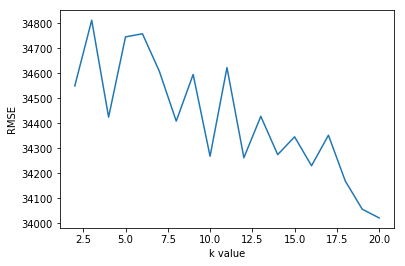

In [312]:
# Plotting avg rmse
lists = sorted(avge_rmse_num.items()) 
x, y = zip(*lists)

plt.plot(x, y)
plt.xlabel('k value')
plt.ylabel('AVG RMSE')
plt.show()

In [306]:
## Testing on all columns with diffrent K-Folds
avge_rmse_all = {}
for k in range(2,21):
    rmses = train_and_test(new_data, k, numeric = False)
    avge_rmse_all[k] = np.mean(rmses)
    
avge_rmse_all


{2: 32048.80114939163,
 3: 32426.65025863292,
 4: 30931.351367937554,
 5: 31392.7673839294,
 6: 31213.58892080688,
 7: 30906.755734501166,
 8: 31063.84067352509,
 9: 30998.44376767455,
 10: 30666.22669464211,
 11: 30919.95749389249,
 12: 30706.288783287087,
 13: 30745.511793551683,
 14: 30615.006829862563,
 15: 30630.841405182844,
 16: 30549.93745367265,
 17: 30567.870791045025,
 18: 30348.29355016809,
 19: 30398.510383589444,
 20: 30293.640572357857}

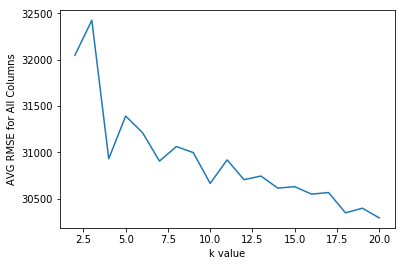

In [313]:
# Plotting avg rmse for all columns
lists = sorted(avge_rmse_all.items()) 
x, y = zip(*lists)

plt.plot(x, y)
plt.xlabel('k value')
plt.ylabel('AVG RMSE for All Columns')
plt.show()

### Summary of Results
It seems that we got better results when training the model on all columns. The best result we got was when K = 20 where rmse was 30293.
I will stop here and will work on removing out liars and do more features engineering in the future.